


# Vamos encher o carrinho!

# Introdução

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos a você foi modificado do original. Reduzimos o tamanho do conjunto de dados para que seus cálculos sejam executados mais rapidamente e introduzimos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos intermédios a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar os dados e fazer a AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
orders = pd.read_csv('/datasets/instacart_orders.csv',sep=';',decimal='.')
products = pd.read_csv('/datasets/products.csv',sep=';',decimal='.')
orders_products = pd.read_csv('/datasets/order_products.csv',sep=';',decimal='.')
aisles = pd.read_csv('/datasets/aisles.csv',sep=';',decimal='.')
departments = pd.read_csv('/datasets/departments.csv',sep=';',decimal='.')

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
orders_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [6]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Conclusões

Foram geradas as informações dos 5 datasets apresentados. No momento, os tipos de dados apresentados são do tipo object e não foram apresentados valores nulos, algo interessante é que todos os datasets possuem uma única coluna como uma série de valores. Agora é necessário verificar se há duplicados ou ausentes

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução


Para preparar os dados, primeiramente verificarei se há valores duplicados e ausentes, depois disso irei padronizar os valores que se difererirem por letras maiúsculas ou diferentes tipos de ortografia

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `orders`

In [8]:
print(orders[orders.duplicated()]) #Aqui eu consigo visualizar quais linhas estão duplicadas
print()
print(orders.duplicated().sum()) #Comando para facilitar a contagem de linhas duplicadas
print(orders.value_counts())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

Há 15 linhas duplicadas, estas possuem o mesmo dia e horário de compra (quarta-feira as 2 da mamnhã)

In [9]:
# Com base nas suas conclusões,
order_2am = orders[(orders['order_dow']==3) & (orders['order_hour_of_day']==2)]
print(order_2am.head)
# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

<bound method NDFrame.head of         order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      1

O que esse resultado quer dizer?
Que dos 121 pedidos feitos neste dia, 15 deles são duplicados, ou seja, o efetivo real de pedidos é de 121-15= 106

In [10]:
# Remova pedidos duplicados
orders = orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Verifique as linhas duplicadas mais uma vez
order_2am = orders[(orders['order_dow']==3) &( orders['order_hour_of_day']==2)]
print(order_2am.head)
# Agora podemos observar que o numero real de pedidos é 106, como já foi visto anteriormente

<bound method NDFrame.head of         order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
456998   3384021    14881             6          3                  2   
458801    910166   164782            18          3                  2   
459620   1680532   106435             6          3                  2   
468309    222962    54979            59          3                  2   
477511   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      1

In [12]:
# Verifique novamente apenas os IDs de pedidos duplicados
print(orders[orders['order_id'].duplicated()])

print(orders.duplicated().sum())


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
0


Descreva brevemente suas conclusões e o que você fez com elas.
Primeiramente usei o método info para saber mais a respeito dos datasets, ao notar que o delimitador dos datasets era o ';' chamei o set=; para obter uma visualização mais clara dos dados. Ao fazer isso verificamos os duplicados e notamos que todos os pedidos duplicados possuíam o dia e a hora do pedido em comum, então filtramos o dataset para o dia e a hora que achamos em comum para assim tratar os dados que tinhamos.

### DataFrame `products`

In [13]:
# Verifique se há linhas completamente duplicadas
print(products[products.duplicated()])
print(products.duplicated().sum())

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []
0


In [14]:
# Verifique apenas se há IDs de departamentos duplicados
print(products[products['product_id'].duplicated()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [15]:
# Verifique apenas se há nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
products['product_name']= products['product_name'].str.lower()
print()
print(products['product_name'].duplicated().sum())


1361


In [16]:
# Verifique os nomes de produtos duplicados que não estão faltando
print(products[~(products['product_name'].isna()) & (products['product_name'].str.lower().duplicated())])

       product_id                                     product_name  aisle_id  \
2058         2059                                  biotin 1000 mcg        47   
5455         5456                 green tea with ginseng and honey        96   
5558         5559                           cream of mushroom soup        69   
7558         7559                        cinnamon rolls with icing       105   
9037         9038                           american cheese slices        21   
...           ...                                              ...       ...   
49689       49690                    high performance energy drink        64   
49690       49691                    original pancake & waffle mix       130   
49691       49692  organic instant oatmeal light maple brown sugar       130   
49692       49693                           spring water body wash       127   
49693       49694                          burrito- steak & cheese        38   

       department_id  
2058            

Ao passar os nomes para minúsculo, foi possível verificar produtos duplicados

### DataFrame `departments`

In [17]:
# Verifique se há linhas completamente duplicadas
print(departments[departments.duplicated()])

Empty DataFrame
Columns: [department_id, department]
Index: []


In [18]:
# Verifique apenas se há IDs dos produtos duplicados
print(departments['department'].sort_values())

4             alcohol
17             babies
2              bakery
6           beverages
13          breakfast
9                bulk
14       canned goods
15         dairy eggs
19               deli
8     dry goods pasta
0              frozen
16          household
5       international
11       meat seafood
20            missing
1               other
12             pantry
10      personal care
7                pets
3             produce
18             snacks
Name: department, dtype: object


Conclui que não há duplicados no dataframe 'departments', após isso para fazer uma checagem ordenei em ordem alfabética para uma conferencia rápida e visual já que é um dataframe relativamente curto

### DataFrame `aisles`

In [19]:
# Verifique se há linhas completamente duplicadas
print(aisles[aisles.duplicated()])

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [20]:
# Verifique apenas se há IDs dos produtos duplicados
aisles['aisle'] = aisles['aisle'].str.lower()
print(aisles['aisle'].value_counts())

fresh pasta                   1
trail mix snack mix           1
vitamins supplements          1
muscles joints pain relief    1
milk                          1
                             ..
more household                1
soy lactosefree               1
pasta sauce                   1
fresh herbs                   1
cream                         1
Name: aisle, Length: 134, dtype: int64


Conclui que não há duplicados no dataframe 'aisles'.

### DataFrame `order_products`

In [21]:
# Verifique se há linhas completamente duplicadas
print(orders_products[orders_products.duplicated()])
print(orders_products.duplicated().sum())
print(orders_products.head(10))

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
0
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
5   2456893       21616                4.0          1
6    644579       12341                5.0          1
7   2231852       44925               10.0          1
8   3185766       36259               14.0          1
9    420019       23315                4.0          1


In [22]:
# Verifique mais uma vez se há outros casos complicados de duplicados
print(orders_products.value_counts())

order_id  product_id  add_to_cart_order  reordered
4         10054       5.0                1            1
2277733   35233       5.0                1            1
2277734   15233       4.0                1            1
          11471       2.0                1            1
          6374        3.0                1            1
                                                     ..
1145037   26790       21.0               1            1
          27767       10.0               1            1
          32086       16.0               0            1
          33572       5.0                1            1
3421079   30136       1.0                0            1
Length: 4544171, dtype: int64


Não há presença de linhas totalmente duplicadas, primeiramente chamei o duplicated e sum para conferir, depois disso para finalizar verifiquei com o value_counts

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [23]:
# Encontre valores ausentes na coluna 'product_name'
print(products[products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Temos 1258 valores ausentes na coluna product_name

In [24]:
# Todos os nomes de produtos ausentes estão associados com a seção de ID 100?
print(products[(products['product_name'].isna()) & (products['aisle_id']!=100)])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Sim, todos os nomes de produtos estão associados ao ID 100

In [25]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
print(products[(products['product_name'].isna()) & (products['department_id']!=21)])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Precisa usar != em vez de == 
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Sim, todos os nomes de produtos estão associados ao ID 21

In [26]:
# Use as tabelas de departamentos e seções para verificar os dados da seção ID 100 e do departamento ID 21.
print(aisles[(aisles['aisle_id']==100)])
print(departments[departments['department_id']==21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Foi possível verificar que os nomes que estão faltando estão categorizados em setores e departamentos como algo que está em falta

In [27]:
# Preencha nomes de produtos ausentes com 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
print(products[(products['aisle_id']==100) & (products['department_id']==21)])

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Foi utilizado o metodo fillna() para preencher os valores vazios com 'Unknown', para fazer a verificação chamei os ID's 100 e 21 que são os departamentos que estavam localizados os valores vazios para realizar a comparação

### DataFrame `orders`

In [28]:
# Encontre os valores ausentes
print(orders[orders['order_id'].isna()])
print(orders[orders['user_id'].isna()])
print(orders[orders['order_number'].isna()])
print(orders[orders['order_dow'].isna()])
print(orders[orders['order_hour_of_day'].isna()])
print(orders[orders['days_since_prior_order'].isna()])


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    

In [29]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
print(orders[(orders['order_number']>1) & (orders['days_since_prior_order'].isna())])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Não há valores ausentes para quem não está realizando o primeiro pedido, para observar isso filtrei na coluna order_number as pessoas com mais de um pedido juntamente com os numeros ausentes da coluna days_since_prior_order

### DataFrame `order_products`

In [30]:
# Encontre os valores ausentes
print(orders_products[orders_products['order_id'].isna()]) 
print(orders_products[orders_products['product_id'].isna()])
print(orders_products[orders_products['add_to_cart_order'].isna()])
print(orders_products[orders_products['reordered'].isna()])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
In

In [31]:
# Quais são os valores mínimo e máximo dessa coluna?
valor_minimo = orders_products['add_to_cart_order'].min()
valor_maximo = orders_products['add_to_cart_order'].max()
print(valor_minimo)
print(valor_maximo)

1.0
64.0


Existem 836 pedidos com 'add_to_cart_order' ausentes.

In [32]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
# Filtrando os registros onde 'add_to_cart_order' é NaN
cart_ausente = orders_products[orders_products['add_to_cart_order'].isna()]

# Exibindo os IDs dos pedidos únicos que têm pelo menos um item com 'add_to_cart_order' ausente
order_unique = cart_ausente['order_id'].unique()
print(order_unique)


[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?

# Agrupe os pedidos com dados ausentes por ID de pedido
pedidos_valores_ausentes = orders_products[orders_products['order_id'].isin(order_unique)][['order_id','add_to_cart_order']]
contagem_produtos_por_pedido = pedidos_valores_ausentes.groupby('order_id')['add_to_cart_order'].count()
todos_mais_de_64 = (contagem_produtos_por_pedido > 64).all()
print(f"Todos os pedidos com valores ausentes contêm mais de 64 produtos? {todos_mais_de_64}")
# Agrupe os pedidos com dados ausentes por ID de pedido

# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem


Todos os pedidos com valores ausentes contêm mais de 64 produtos? False


Descreva brevemente suas conclusões.

In [34]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
orders_products['add_to_cart_order'] = orders_products['add_to_cart_order'].fillna(999)

# Converter a coluna 'add_to_cart_order' para o tipo integer
orders_products['add_to_cart_order'] = orders_products['add_to_cart_order'].astype(int)

# Verificar as alterações
print(orders_products['add_to_cart_order'].isna().sum())
print(orders_products[orders_products['add_to_cart_order'].isna()])

0
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


Foi subsituido os valores nan por 999 e depois foi convertido a coluna add_to_cart_order para o tipo int

## Conclusões

Foi bastante desafiante essa parte de filtragem e tratamento dos dados, porém foi muito importante para fixar alguns conceitos e tambem tratar os dados para análisá-los posteriormente

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A]

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos por cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [35]:
# Verificando 'order_hour_of_day'
min_hour = orders['order_hour_of_day'].min()
max_hour = orders['order_hour_of_day'].max()
print(f"'order_hour_of_day' varia de {min_hour} a {max_hour}")



'order_hour_of_day' varia de 0 a 23


In [36]:
# Verificando 'order_dow'
min_dow = orders['order_dow'].min()
max_dow = orders['order_dow'].max()
print(f"'order_dow' varia de {min_dow} a {max_dow}")

'order_dow' varia de 0 a 6


Os valores fazem sentido

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

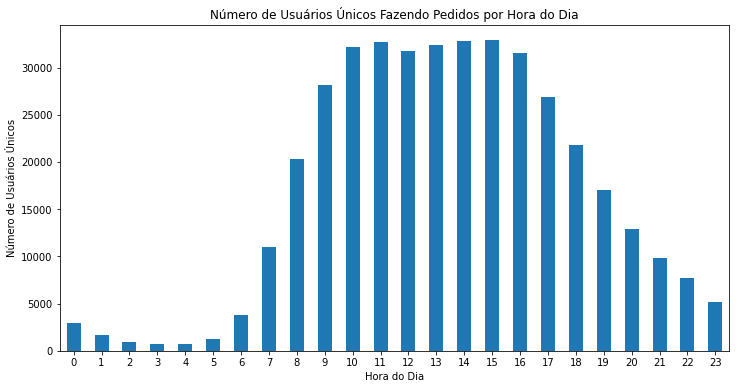

In [37]:
unique_users_per_hour = orders.groupby('order_hour_of_day')['user_id'].nunique()

# Agora, criando o gráfico
plt.figure(figsize=(12, 6))
unique_users_per_hour.plot(kind='bar',
                          title='Número de Usuários Únicos Fazendo Pedidos por Hora do Dia',
                          xlabel='Hora do Dia',
                          ylabel='Número de Usuários Únicos',
                          rot=0)

plt.show()


Os horários de pico de pedidos são entre as 09:00 às 17:00, sendo os pontos mais altos as 11:00 e às 15:00

### [A3] Em que dia da semana as pessoas fazem compras?

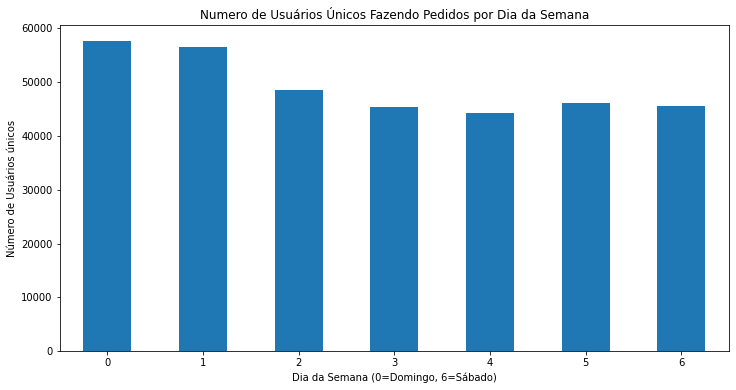

In [38]:


unique_user_per_day = orders.groupby('order_dow')['user_id'].nunique()


unique_user_per_day.plot(
    kind='bar',
    title='Numero de Usuários Únicos Fazendo Pedidos por Dia da Semana',
    xlabel='Dia da Semana (0=Domingo, 6=Sábado)',
    ylabel='Número de Usuários únicos',
    figsize=(12,6),
    rot=0)

plt.show()


Os dia com maior número de pedidos é domingo, em seguida da segunda, o dia mais tranquilo é quinta-feira

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Os picos de tempo que as pessoas esperam para fazer outro pedido são de 10 e 30 dias

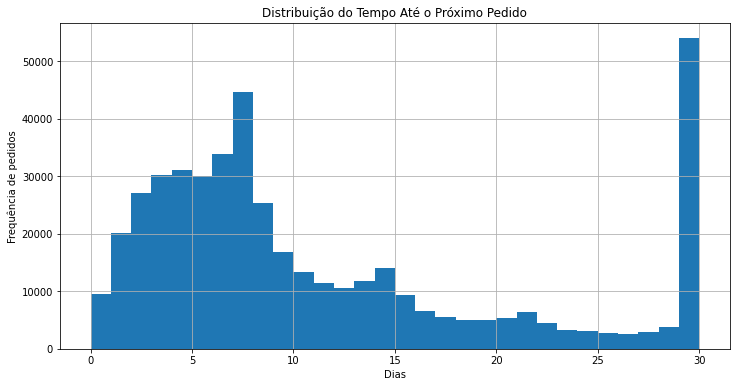

In [39]:
orders['days_since_prior_order'].hist(bins=30,figsize=(12,6))
plt.title('Distribuição do Tempo Até o Próximo Pedido')
plt.xlabel('Dias')
plt.ylabel('Frequência de pedidos')
plt.show()



# [B] 

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

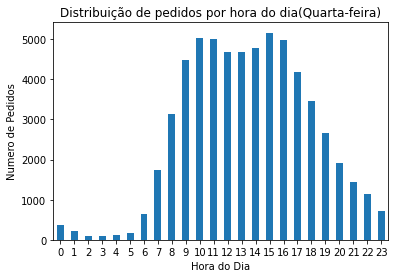

In [40]:
orders[orders['order_dow']==3]['order_hour_of_day'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de pedidos por hora do dia(Quarta-feira)')
plt.xlabel('Hora do Dia')
plt.ylabel('Numero de Pedidos')
plt.xticks(rotation=0)
plt.show()

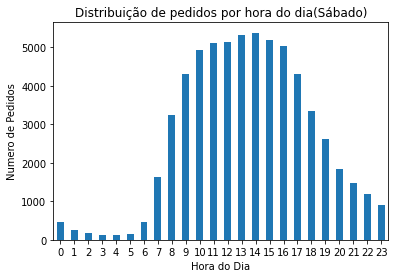

In [41]:
orders[orders['order_dow']==6]['order_hour_of_day'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de pedidos por hora do dia(Sábado)')
plt.xlabel('Hora do Dia')
plt.ylabel('Numero de Pedidos')
plt.xticks(rotation=0)
plt.show()

Conclui que nas quartas a maior incidencia de pedidos ocorre às 15:00, seguido de 10:00 e 11:00. Já nos sábados a maior incidencia de pedidos ocorre as 14:00, seguido de 13:00 e 15:00

### [B2] Qual é a distribuição do número de pedidos por cliente?

In [42]:
# Calculando novamente a distribuição do número de pedidos por cliente para garantir a consistência
orders_per_customer = orders.groupby('user_id')['order_id'].nunique()
orders_distribution = orders_per_customer.value_counts().sort_index()



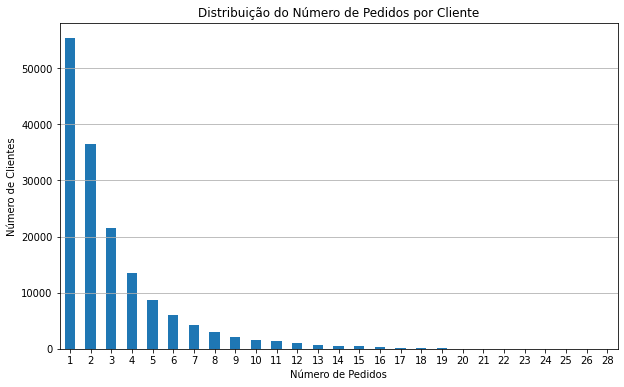

In [43]:
# Criando o gráfico de distribuição
plt.figure(figsize=(10, 6))
orders_distribution.plot(kind='bar')
plt.title('Distribuição do Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)  # Garante que os rótulos do eixo X estejam na horizontal
plt.grid(axis='y')

# Mostrando o gráfico
plt.show()

A maioria dos clientes possuí apenas um único pedido

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [51]:
# Contando a frequência de compra de cada produto no DataFrame de exemplo
product_counts = products['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'count']
# Filtrando os 20 produtos mais frequentes
top_20_products = product_counts.sort_values(by='count', ascending=False).head(20)


In [52]:
print(top_20_products)

       product_id  count
0            2049      1
33145       45078      1
33123          32      1
33124       49176      1
33125       24588      1
33126        6147      1
33127        8196      1
33128       10245      1
33129       12294      1
33130       14343      1
33131       16392      1
33132       18441      1
33133       20490      1
33134       22539      1
33135       26637      1
33136       47127      1
33137       28686      1
33138       30735      1
33139       32784      1
33140       34833      1


In [46]:
# Usando merge() para combinar com a tabela de produtos e obter os nomes
top_20_products_with_names = pd.merge(top_20_products, products, on='product_id')

In [47]:
# Ordenando os produtos pela frequência de compra e exibindo os resultados
top_20_products_with_names = top_20_products_with_names.sort_values('count', ascending=False)
top_20_products_with_names[['product_id', 'product_name']]

,product_id,product_name
0,2049,malbec mendoza
1,45078,pomegranatea
18,32784,natural shredded mexican style four cheese
17,30735,advance powder
16,28686,premium pomegranate spread
15,47127,everyday shea body lotion
14,26637,sour cream & onion flavor protein chips
13,22539,first bananas stage 1 4 months +
12,20490,pumpkin banana mighty 4 bars
11,18441,organic ketchup


In [58]:
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [59]:
df_merge = orders_products.merge(products, on='product_id')
top_products = df_merge.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)
top_products.head(20)

product_id  product_name            
24852       banana                      66050
13176       bag of organic bananas      53297
21137       organic strawberries        37039
21903       organic baby spinach        33971
47209       organic hass avocado        29773
47766       organic avocado             24689
47626       large lemon                 21495
16797       strawberries                20018
26209       limes                       19690
27845       organic whole milk          19600
27966       organic raspberries         19197
22935       organic yellow onion        15898
24964       organic garlic              15292
45007       organic zucchini            14584
39275       organic blueberries         13879
49683       cucumber kirby              13675
28204       organic fuji apple          12544
5876        organic lemon               12232
8277        apple honeycrisp organic    11993
40706       organic grape tomatoes      11781
dtype: int64

# [C] 

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.



### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [48]:
items_per_order = orders_products.groupby('order_id')['product_id'].count()

# Calculando estatísticas básicas para entender a distribuição
items_distribution_stats = items_per_order.describe()



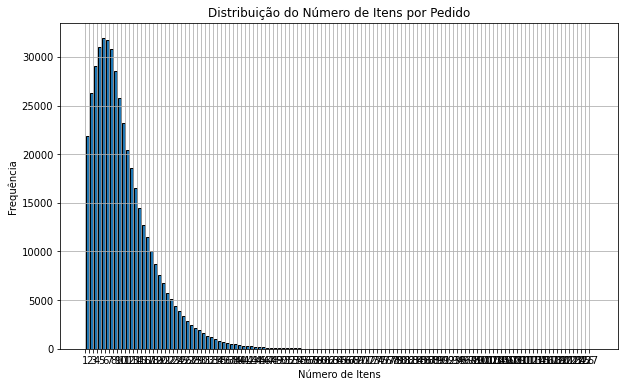

(count    450046.000000
 mean         10.098983
 std           7.540206
 min           1.000000
 25%           5.000000
 50%           8.000000
 75%          14.000000
 max         127.000000
 Name: product_id, dtype: float64,
 None)

In [49]:
# Preparando a visualização da distribuição
plt.figure(figsize=(10, 6))
items_per_order.hist(bins=range(1, items_per_order.max() + 2), edgecolor='black', rwidth=0.8)
plt.title('Distribuição do Número de Itens por Pedido')
plt.xlabel('Número de Itens')
plt.ylabel('Frequência')
plt.xticks(range(1, items_per_order.max() + 1))

items_distribution_stats, plt.show()

### [C2] Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

In [50]:
# Filtrar produtos reordenados
reordered_products = orders_products[orders_products['reordered'] == 1]

# Agrupar por product_id e contar reordenações
reordered_count = reordered_products.groupby('product_id').size().reset_index(name='reordered_count')

# Ordenar pela contagem de reordenações de forma decrescente e selecionar os 20 principais
top_20_reordered = reordered_count.sort_values(by='reordered_count', ascending=False).head(20)

# Fazer join com a tabela products para obter os nomes dos produtos
top_20_reordered_with_names = pd.merge(top_20_reordered, products[['product_id', 'product_name']], on='product_id')

# Exibir os resultados
top_20_reordered_with_names

,product_id,reordered_count,product_name
0,24852,55763,banana
1,13176,44450,bag of organic bananas
2,21137,28639,organic strawberries
3,21903,26233,organic baby spinach
4,47209,23629,organic hass avocado
5,47766,18743,organic avocado
6,27845,16251,organic whole milk
7,47626,15044,large lemon
8,27966,14748,organic raspberries
9,16797,13945,strawberries


Escreva suas conclusões aqui

# Conclusão geral do projeto:


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição
- Uso de recursos mais avançados (ex: all())

    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> O projeto está bom. Porém, há alguns pequenos detalhes que o checklist de aprovação exige </span>


Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário em **azul** para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>



<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

    
<span class="text-danger">As seções B3 aprsentam erros que não foram corrigidos. Deixei dicas</span>

</div>



<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Parabéns pelo esforço e correção. Eu identifiquei um erro no dataset utilizado. Peço desculpas pois só vi isso agora. A lógica/estrutura do seu código está correto mas o dataset usado não. Por favor, veja o código correto que deixei. Não vamos fazer uma nova iteração.
Parabéns pela aprovação.
    
Desejo sucesso na jornada.
</div>
